# Análise de dados do comércio varejita 

In [5]:
# Importação de bibliotecas
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt 

In [6]:
# Carregamento dos dados
dados = pd.read_csv("dados/dataset.csv")

In [7]:
# Conferência inicial - tamanho do df, variáveis contidas
dados.shape # nº de linhas,  nº de colunas
dados.dtypes # Verificação das variáveis e o tipo de cada uma delas
dados.isnull().sum() # Conferência do preenchimento
dados.head() 

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [30]:
# Pergunta de negócio 1 - Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?
dados_office_supplies = dados[dados['Categoria'] == "Office Supplies"]
cidades_vendas = dados_office_supplies.groupby("Cidade")["Valor_Venda"].sum()
cidade_maior_venda = cidades_vendas.idxmax()
print(f"A cidade com o maior número de vendas é {cidade_maior_venda}")

A cidade com o maior número de vendas é New York City


In [ ]:

cidades_vendas.index
cidades_vendas.values

Text(0.5, 0, 'Valor de venda')

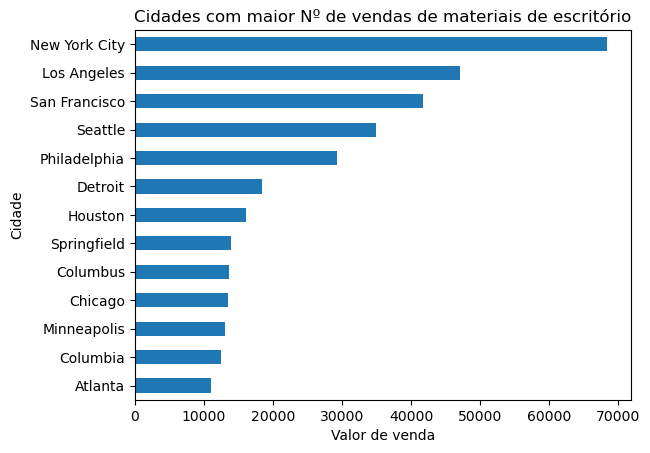

In [46]:
# Pergunta 1 - Plot
cidades_maiores_vendas = cidades_vendas.where( cidades_vendas > 10000).dropna()
cidades_maiores_vendas_ord = cidades_maiores_vendas.sort_values(ascending = True)
plot1 = cidades_maiores_vendas_ord.plot(kind = "barh", title = "Cidades com maior Nº de vendas de materiais de escritório")
plot1.set_xlabel("Valor de venda")

In [78]:
# Pergunta de negócio 2 - Qual o Total de Vendas Por Data do Pedido?
total_por_data = dados.groupby("Data_Pedido")["Valor_Venda"].sum()
#total_por_data.dtype
#type(total_por_data)
total_por_data.index = pd.to_datetime(total_por_data.index, format = "%d/%m/%Y")
total_por_data_ord = total_por_data.sort_index()

total_por_data_ord_MY= total_por_data_ord.groupby(pd.Grouper(freq="M")).sum()


Text(0.5, 0, 'Data de venda')

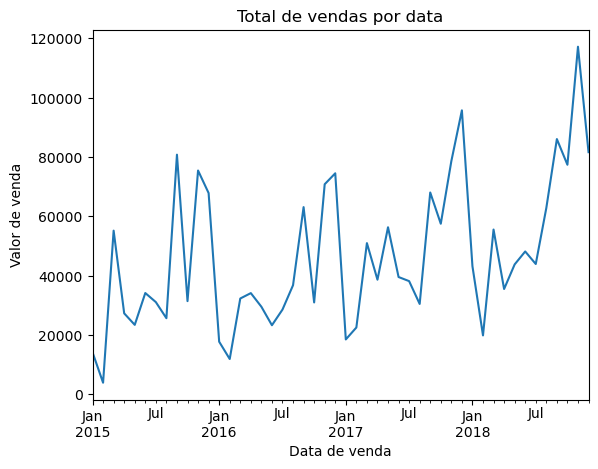

In [81]:
# Pergunta 2 - Plot

plot2 = total_por_data_ord_MY.plot( kind = "line", title = "Total de vendas por data")
plot2.set_ylabel("Valor de venda")
plot2.set_xlabel("Data de venda")

In [89]:
# Pergunta 3 - Qual o Total de Vendas por Estado?
vendas_estado = dados.groupby("Estado")["Valor_Venda"].sum()
vendas_estado = vendas_estado.sort_values(ascending = True)

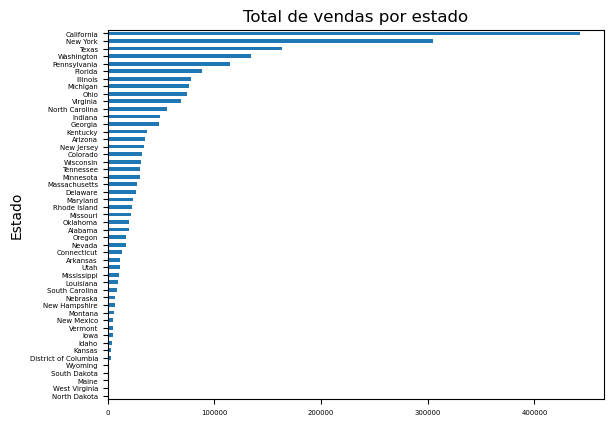

In [94]:
# Pergunta 3 - Plot

plot3 = vendas_estado.plot(kind = "barh", title = "Total de vendas por estado", fontsize = "5")

Text(0.5, 0, 'Valor total de vendas')

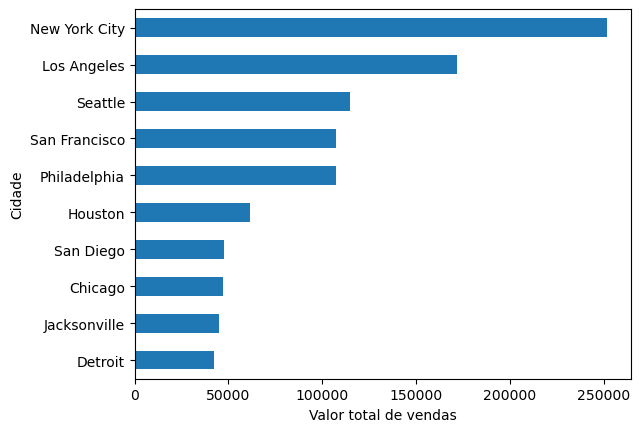

In [106]:
# Pergunta 4 - Quais São as 10 Cidades com Maior Total de Vendas?
total_por_cidade = dados.groupby("Cidade")["Valor_Venda"].sum() 
total_por_cidade_ord = total_por_cidade.sort_values(ascending = False)
total_por_cidade_10primeiras = total_por_cidade_ord.head(n = 10)

In [ ]:
# Pergunta 4 - plot
total_por_cidade_10primeiras = total_por_cidade_10primeiras.sort_values(ascending = True)
plot4 = total_por_cidade_10primeiras.plot(kind = "barh")
plot4.set_xlabel("Valor total de vendas")

In [ ]:
# Pergunta 5 - Qual Segmento Teve o Maior Total de Vendas?